In [2]:
#import libraries
import numpy as np
import cv2
import time
from IPython.display import Image #use to show image in notebook


In [ ]:
# basic camera use demo
start_time = time.time()
frames_captured = 0

cap = cv2.VideoCapture(0)

while(True):
    # Capture one frame
    ret, frame = cap.read()
    frames_captured += 1

    # Display the frame in grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

end_time = time.time()
elapsed_time = end_time - start_time
frames_per_second = frames_captured / elapsed_time

print("Frames captured  : {}".format(frames_captured))
print("Elapsed time     : {:.2f}".format(elapsed_time))
print("Frames per second: {:.0f}".format(frames_per_second))

# Release the VideoCapture
cap.release()
cv2.destroyAllWindows()

In [7]:
# Capture one frame\n
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cv2.imwrite("test.jpg", frame)
cap.release()

In [22]:
# original motion detection code
cap = cv2.VideoCapture(0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractorMOG2()
frame_count = 0

while(True):
    ret, frame = cap.read()
    frame_count += 1
    
    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    
    cv2.imshow('frame', fgmask)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
        
# Release the VideoCapture
cap.release()
cv2.destroyAllWindows()

In [4]:
%pwd

'/home/pi/opencv-tensorflow'

In [ ]:
# custom motion detection

def motion_detect():
    frame_count = 0
    while(True):
        ret, frame = cap.read()
        frame_count += 1

        fgmask = fgbg.apply(frame)
        fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

        if (frame_count > 50) & (fgmask.sum() > 1000000):
            print(fgmask.sum())
            print("Movement!")
            return frame
cap = cv2.VideoCapture(0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractorMOG2()
iterations = 0
while(True):
    iterations += 1
    if iterations > 5: #number of images to capture
        break
    frame = motion_detect()
    filename = "test_" + str(iterations) + ".jpeg"
    cv2.imwrite(filename, frame)
    print(filename + " saved")
    Image(filename=filename)

# Release the VideoCapture
cap.release()

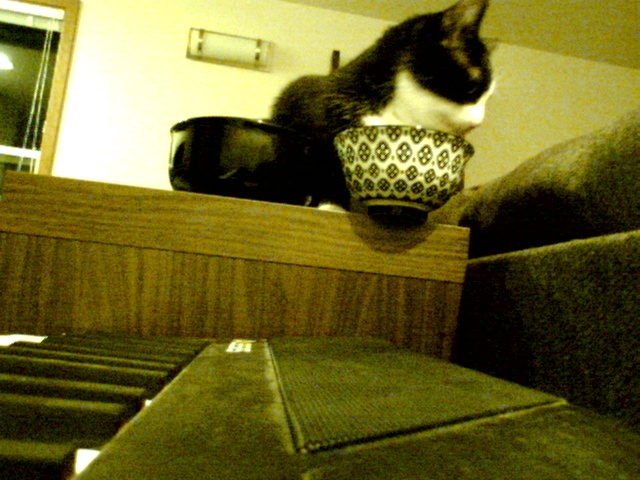

In [35]:
Image(filename='test_1.jpeg')

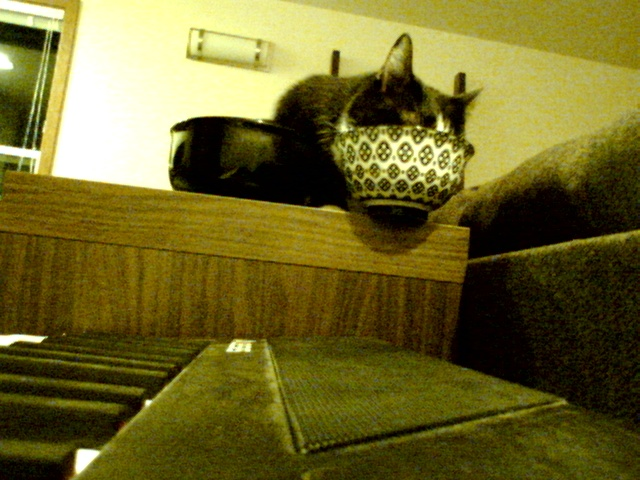

In [36]:
Image(filename='test_2.jpeg')

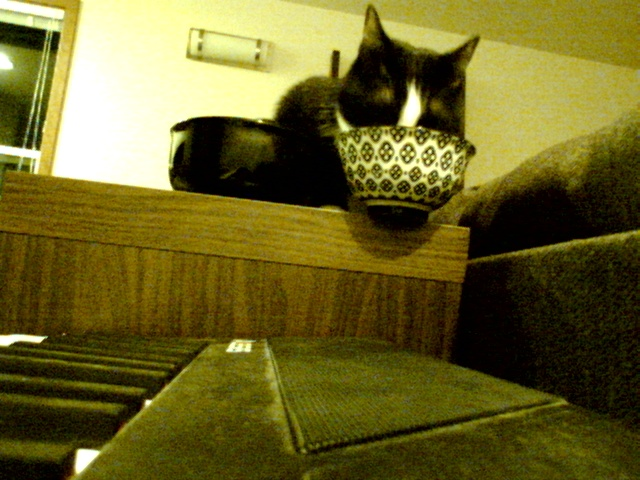

In [37]:
Image(filename='test_3.jpeg')

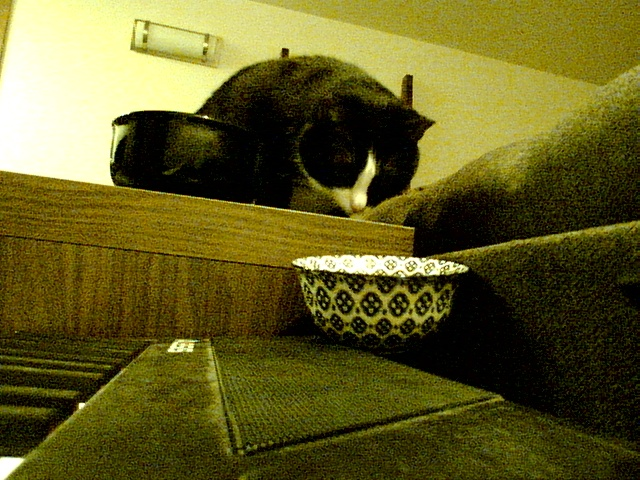

In [38]:
Image(filename='test_4.jpeg')

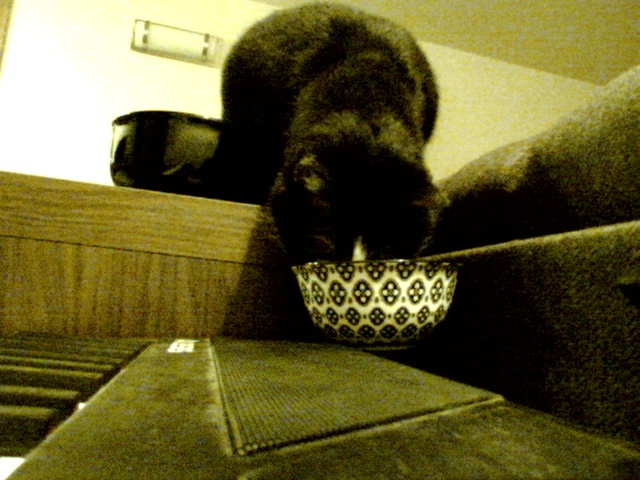

In [39]:
Image(filename='test_5.jpeg')